In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [62]:
df_exercise=pd.read_csv('exercise.csv')
df_calories=pd.read_csv('calories.csv')

In [63]:
df_exercise.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [64]:
df_calories.head(5)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [65]:
df=pd.concat([df_exercise,df_calories['Calories']],axis=1)
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [66]:
df.shape

(15000, 9)

In [67]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [70]:
# statistical info of the Data
df.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [71]:
sns.set_theme()
# Plotting the Gender Column
# sns.countplot(df['Gender'])

C:\Users\91620\AppData\Local\Temp\ipykernel_15252\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

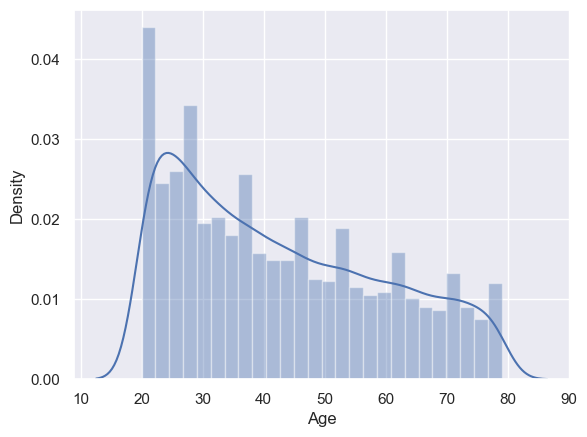

In [72]:
sns.distplot(df['Age'])

C:\Users\91620\AppData\Local\Temp\ipykernel_15252\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

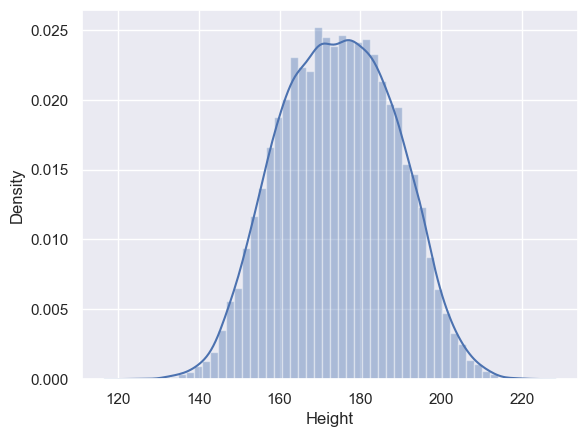

In [73]:
sns.distplot(df['Height'])

C:\Users\91620\AppData\Local\Temp\ipykernel_15252\3220751949.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

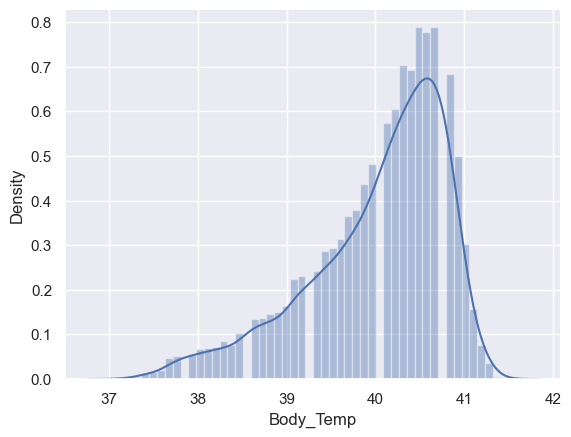

In [74]:
sns.distplot(df['Body_Temp'])

C:\Users\91620\AppData\Local\Temp\ipykernel_15252\1463722021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

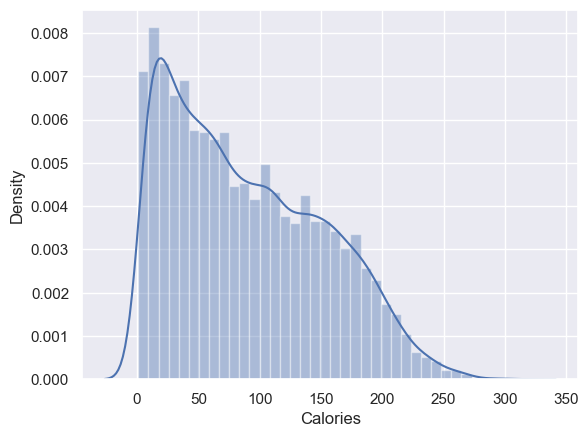

In [75]:
sns.distplot(df['Calories'])

C:\Users\91620\AppData\Local\Temp\ipykernel_15252\1351347043.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

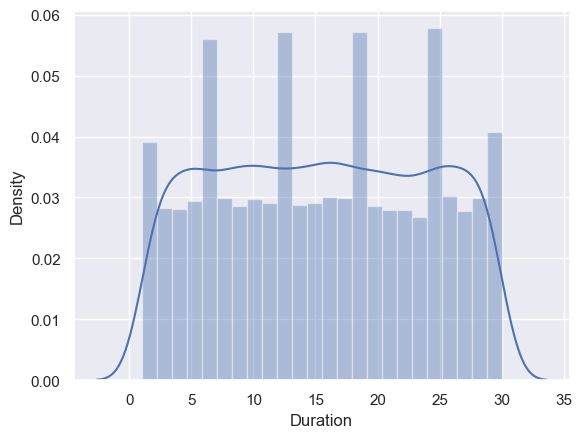

In [76]:
sns.distplot(df['Duration'])

C:\Users\91620\AppData\Local\Temp\ipykernel_15252\4154507538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

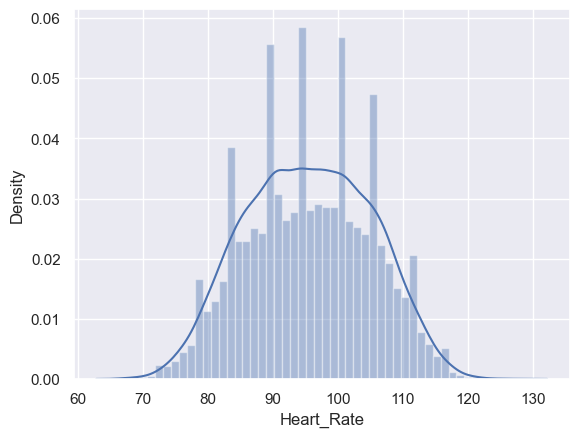

In [77]:
sns.distplot(df['Heart_Rate'])

C:\Users\91620\AppData\Local\Temp\ipykernel_15252\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

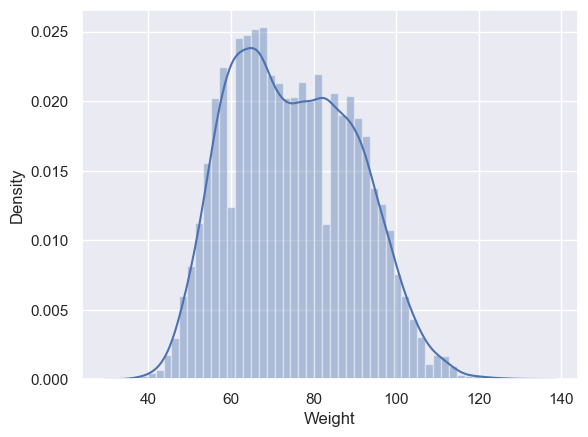

In [78]:
sns.distplot(df['Weight'])

In [79]:
# Finding Correlation
df.corr()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,-0.000687,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,-0.001827,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

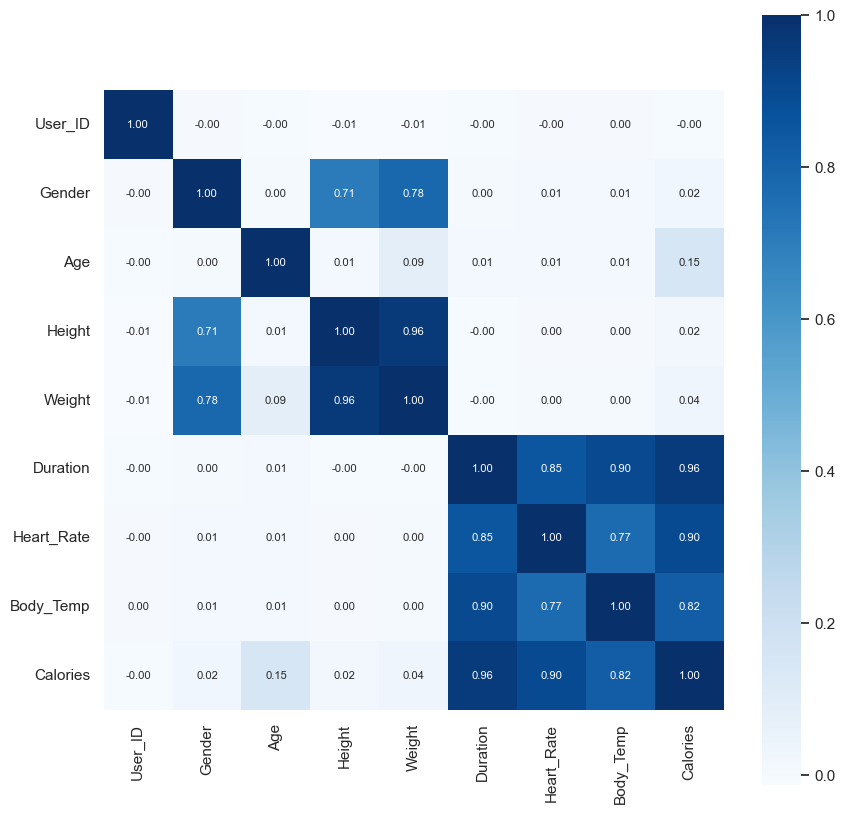

In [80]:
correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar='True',square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')

In [81]:
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [82]:
X=df.drop(columns=['User_ID','Calories'])
y=df['Calories']

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
model=XGBRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(metrics.r2_score(y_pred,y_test))

0.9987052629705581


In [84]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 11499 to 7250
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      3750 non-null   int32  
 1   Age         3750 non-null   int64  
 2   Height      3750 non-null   float64
 3   Weight      3750 non-null   float64
 4   Duration    3750 non-null   float64
 5   Heart_Rate  3750 non-null   float64
 6   Body_Temp   3750 non-null   float64
dtypes: float64(5), int32(1), int64(1)
memory usage: 219.7 KB


In [85]:
g=input("Enter Your sex: ")
gender=-1
if g.lower()=='male':
    gender=1
elif g.lower()=='female':
    gender=0
else:
    gender=-1

age=int(input("Enter your age: "))
height=float(input("Enter your Height: "))
weight=float(input("Enter your Weight: "))
duration=float(input("Enter your Duration of Exercise in Minutes: "))
heart=float(input("Enter your Heart Rate after Exercise: "))
Body_temp=float(input("Enter your Body Temperature: "))

X_list=[gender,age,height,weight,duration,heart,Body_temp]
X_df=pd.DataFrame([X_list])






In [86]:
X_df.columns=['Gender','Age','Height','Weight','Duration','Heart_Rate','Body_Temp']


In [87]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1 non-null      int64  
 1   Age         1 non-null      int64  
 2   Height      1 non-null      float64
 3   Weight      1 non-null      float64
 4   Duration    1 non-null      float64
 5   Heart_Rate  1 non-null      float64
 6   Body_Temp   1 non-null      float64
dtypes: float64(5), int64(2)
memory usage: 184.0 bytes


In [88]:
y_pred_data=model.predict(X_df)
print("Congratulations!!!\nYou Burnt %.3f CALORIES Today"%y_pred_data)

Congratulations!!!
You Burnt 253.338 CALORIES Today
